In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# 元データの読み込みと整形
df = pd.read_excel("test2.xlsx")
df.columns = ['halfgold_ratio', 'doping_concentration', 'resistance_reduction']

# 学習用データ
X = df[['halfgold_ratio', 'doping_concentration']]
y = df['resistance_reduction']

# ランダムフォレストモデルの学習
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 予測対象の組み合わせ
ratios = np.arange(100, 79, -2)  # 100, 98, ..., 80
dopes = np.arange(1, 6)          # 1, ..., 5
predict_grid = pd.DataFrame(
    [(r, d) for r in ratios for d in dopes],
    columns=['halfgold_ratio', 'doping_concentration']
)

# 必要な特徴量だけ使って予測
X_pred = predict_grid[['halfgold_ratio', 'doping_concentration']]
predict_grid['predicted_resistance_reduction'] = model.predict(X_pred)

# 結果をCSVに保存
predict_grid.to_csv("prediction_results_rf.csv", index=False, encoding='utf-8-sig')
print("prediction_results_rf.csv に保存しました。")


prediction_results_rf.csv に保存しました。


C:\Users\sumik\AppData\Local\Temp\ipykernel_21244\3526850529.py:33: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sumik\AppData\Local\Temp\ipykernel_21244\3526850529.py:33: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sumik\AppData\Local\Temp\ipykernel_21244\3526850529.py:33: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sumik\AppData\Local\Temp\ipykernel_21244\3526850529.py:33: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sumik\AppData\Local\Temp\ipykernel_21244\3526850529.py:33: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sumik\AppData\Local\Temp\ipykernel_21244\3526850529.py:33: UserWarning: Glyph 24819 (\

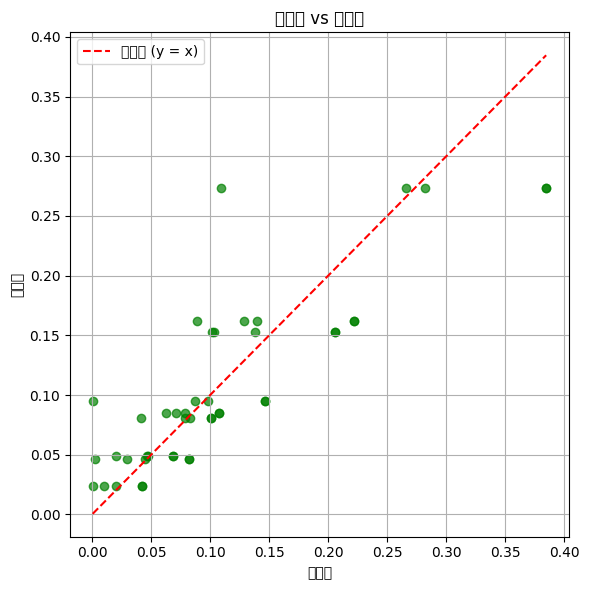

平均二乗誤差（MSE）: 0.002
決定係数（R²）: 0.713


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Excelデータの読み込みと前処理
df = pd.read_excel("test2.xlsx")
df.columns = ['halfgold_ratio', 'doping_concentration', 'resistance_reduction']

# 特徴量と目的変数
X = df[['halfgold_ratio', 'doping_concentration']]
y = df['resistance_reduction']

# モデル学習（ランダムフォレスト）
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 実測 vs 予測を比較するため、予測値を列に追加
df['predicted'] = model.predict(X)

# 散布図プロット（予測 vs 実測）
plt.figure(figsize=(6, 6))
plt.scatter(df['resistance_reduction'], df['predicted'], color='green', alpha=0.7)
plt.plot([df['resistance_reduction'].min(), df['resistance_reduction'].max()],
         [df['resistance_reduction'].min(), df['resistance_reduction'].max()],
         'r--', label='理想線 (y = x)')
plt.xlabel('実測値')
plt.ylabel('予測値')
plt.title('実測値 vs 予測値')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 精度評価
mse = mean_squared_error(y, df['predicted'])
r2 = r2_score(y, df['predicted'])

print(f"平均二乗誤差（MSE）: {mse:.3f}")
print(f"決定係数（R²）: {r2:.3f}")
